In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [2]:
# loading the data from csv file to pandas dataframe
car_dataset = pd.read_csv(r'C:\Users\santy\Documents/car data.csv')

In [3]:
car_dataset

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [4]:
car_dataset.head(8)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
5,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0
6,ciaz,2015,6.75,8.12,18796,Petrol,Dealer,Manual,0
7,s cross,2015,6.50,8.61,33429,Diesel,Dealer,Manual,0


In [5]:
                  
car_dataset.shape  # checking the number of rows and columns


(301, 9)

In [6]:
car_dataset.info() # getting some information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [7]:
car_dataset.isnull().sum() # checking the number of missing values

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [8]:
# checking the distribution of categorical data of fuel type
F_type=car_dataset.Fuel_Type.value_counts()

In [9]:
F_type

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

In [10]:
# checking the distribution of categorical data of seller_type
seller_type=(car_dataset.Seller_Type.value_counts())

In [11]:
seller_type

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64

In [12]:
# checking the distribution of categorical data of T_type 
T_type=(car_dataset.Transmission.value_counts())

In [13]:
T_type

Manual       261
Automatic     40
Name: Transmission, dtype: int64

In [14]:
# encoding "Fuel_Type" Column
car_dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

# encoding "Seller_Type" Column
car_dataset.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)

# encoding "Transmission" Column
car_dataset.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [15]:
car_dataset.head(10)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0
5,vitara brezza,2018,9.25,9.83,2071,1,0,0,0
6,ciaz,2015,6.75,8.12,18796,0,0,0,0
7,s cross,2015,6.50,8.61,33429,1,0,0,0
8,ciaz,2016,8.75,8.89,20273,1,0,0,0
9,ciaz,2015,7.45,8.92,42367,1,0,0,0


In [21]:
car_dataset.corr()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
Year,1.000000,0.236141,-0.047584,-0.524342,0.053643,-0.039896,-0.000394,-0.182104
Selling_Price,0.236141,1.000000,0.878983,0.029187,0.509467,-0.550724,0.367128,-0.088344
Present_Price,-0.047584,0.878983,1.000000,0.203647,0.440415,-0.512030,0.348715,0.008057
Kms_Driven,-0.524342,0.029187,0.203647,1.000000,0.166801,-0.101419,0.162510,0.089216
Fuel_Type,0.053643,0.509467,0.440415,0.166801,1.000000,-0.352415,0.080466,-0.055705
Seller_Type,-0.039896,-0.550724,-0.512030,-0.101419,-0.352415,1.000000,-0.063240,0.124269
Transmission,-0.000394,0.367128,0.348715,0.162510,0.080466,-0.063240,1.000000,0.050316
Owner,-0.182104,-0.088344,0.008057,0.089216,-0.055705,0.124269,0.050316,1.000000


<AxesSubplot:>

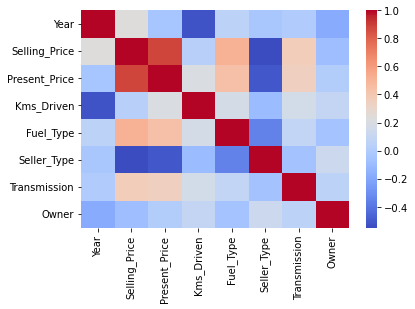

In [23]:
sns.heatmap(car_dataset.corr(),cmap='coolwarm')

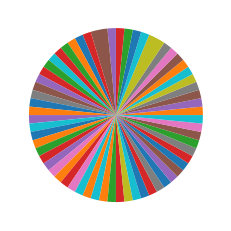

In [18]:
import numpy as np

Pie= np.array(car_dataset["Fuel_Type"])

plt.pie(Pie)
plt.show() 

In [24]:
X = car_dataset.drop(['Car_Name','Selling_Price'],axis=1)
Y = car_dataset['Selling_Price']

In [25]:
X

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5.59,27000,0,0,0,0
1,2013,9.54,43000,1,0,0,0
2,2017,9.85,6900,0,0,0,0
3,2011,4.15,5200,0,0,0,0
4,2014,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...
296,2016,11.60,33988,1,0,0,0
297,2015,5.90,60000,0,0,0,0
298,2009,11.00,87934,0,0,0,0
299,2017,12.50,9000,1,0,0,0


In [26]:
Y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state=2)

# Model Testing
Decision tree regressor

In [28]:
#from sklearn.model_selection import train_test_split
#xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2)

from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(X_train, Y_train)
predictions = model.predict(X_test)

from sklearn.metrics import mean_absolute_error
model.score(X_test, predictions)

1.0

In [ ]:
# model accuracy for decision tree regressor is 100 %

In [29]:
# loading the linear regression model
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train,Y_train)
# prediction on Training data
training_data_prediction = lin_reg_model.predict(X_train)
# R squared Error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8799451660493698


# Visualize the actual prices and Predicted prices

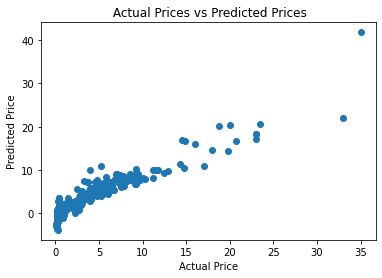

In [30]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [32]:
# prediction on Test data
test_data_prediction = lin_reg_model.predict(X_test)
# R squared Error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8365766715026905


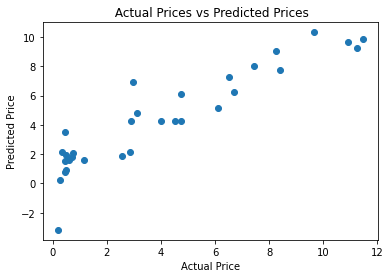

In [33]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [ ]:
#lasso regression model

In [34]:
# loading the linear regression model
lass_reg_model = Lasso()
lass_reg_model.fit(X_train,Y_train)

Lasso()

In [35]:
# prediction on Training data
training_data_prediction = lass_reg_model.predict(X_train)
# R squared Error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8427856123435794


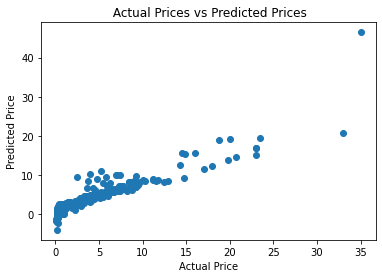

In [36]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [37]:
# prediction on Test data
test_data_prediction = lass_reg_model.predict(X_test)
# R squared Error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8709167941173195


In [ ]:
#model predicted by decision tree regressor is 100% accoracy